Token statistics over all paragraphs:
- Average token length: 516.87
- Minimum token length: 29
- Maximum token length: 8841
- Total number of paragraphs: 2960

Paragraph count per token length bin:

    0–16   : 0 paragraphs
   16–32   : 3 paragraphs
   32–64   : 164 paragraphs
   64–128  : 247 paragraphs
  128–256  : 638 paragraphs
  256–512  : 937 paragraphs
  512–1024 : 644 paragraphs
 1024–2048 : 258 paragraphs
 2048–4096 : 57 paragraphs
 4096–8192 : 10 paragraphs
 8192–16384: 2 paragraphs


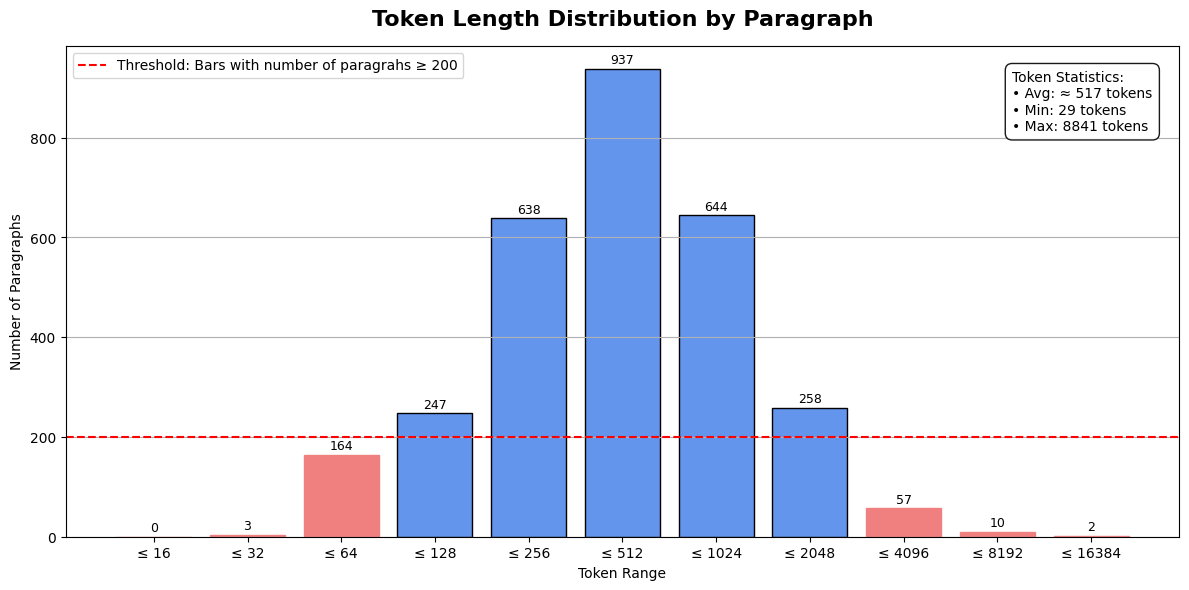

In [ ]:
# Code Generated with the help of ChatGPT

import json
import tiktoken
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer
encoding = tiktoken.encoding_for_model("gpt-4o-mini")

# Load JSON
with open("../../ipynb_notebooks/retrieval_inputs/stored_chunks_for_sparse_retrieval/2960_documents_for_sparse_retrieval_paragraph_wise_chunking_no_overlap_optimal_chunking.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Token counts
token_counts = [len(encoding.encode(item["page_content"])) for item in data]

# Basic stats
avg_tokens = sum(token_counts) / len(token_counts)
min_tokens = min(token_counts)
max_tokens = max(token_counts)
total_paragraphs = len(token_counts)

print("Token statistics over all paragraphs:")
print(f"- Average token length: {avg_tokens:.2f}")
print(f"- Minimum token length: {min_tokens}")
print(f"- Maximum token length: {max_tokens}")
print(f"- Total number of paragraphs: {total_paragraphs}")

# Define bins
bins = [0, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
bin_labels = [f"≤ {bins[i+1]}" for i in range(len(bins)-1)]

# Histogram
hist, bin_edges = np.histogram(token_counts, bins=bins)

# Print bin counts
print("\nParagraph count per token length bin:\n")
for i in range(len(hist)):
    lower = bin_edges[i]
    upper = bin_edges[i + 1]
    count = hist[i]
    print(f"{int(lower):>5}–{int(upper):<5}: {count} paragraphs")

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_labels, hist, color="cornflowerblue", edgecolor="black")

# Add horizontal line for 10% threshold
threshold = 200
plt.axhline(y=threshold, color='red', linestyle='--', label=f"Threshold: Bars with number of paragrahs ≥ {int(threshold)}")

# Annotate low-frequency bins
for i, count in enumerate(hist):
    plt.text(i, count + 5, f"{count}", ha='center', va='bottom', fontsize=9)
    if count < threshold:
        bars[i].set_color("lightcoral")

stats_text = (
    f"Token Statistics:\n"
    f"• Avg: ≈ {round(avg_tokens)} tokens\n"
    f"• Min: {min_tokens} tokens\n"
    f"• Max: {max_tokens} tokens"
)
plt.text(
    0.85, 0.95, stats_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9)
)

# Style
plt.title("Token Length Distribution by Paragraph", y=1.025, fontsize=16, fontweight='bold')
plt.xlabel("Token Range")
plt.ylabel("Number of Paragraphs")
plt.xticks()
plt.grid(axis='y')
plt.legend()
plt.savefig("token_length_distribution.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [5]:
import os
import json
import tiktoken
from tabulate import tabulate
from tqdm import tqdm

# Pfad zum Ordner mit den JSON-Dateien
folder_path = "../../ipynb_notebooks/retrieval_inputs/stored_chunks_for_sparse_retrieval/"

# Tokenizer laden
encoding = tiktoken.encoding_for_model("gpt-4o-mini")

# Tabelle vorbereiten
rows = []

# Alle JSON-Dateien im Ordner durchgehen mit Fortschrittsanzeige
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".json")])
for filename in tqdm(all_files, desc="Processing JSON files"):
    filepath = os.path.join(folder_path, filename)
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        continue

    # Tokenanzahl berechnen mit optionalem Fortschrittsbalken
    total_tokens = 0
    for item in tqdm(data, desc=f"  ↳ Tokenizing {filename}", leave=False):
        text = item.get("page_content", "")
        tokens = encoding.encode(text)
        total_tokens += len(tokens)

    # Zeile zur Tabelle hinzufügen
    rows.append([
        filename,
        total_tokens,
        len(data)
    ])

# Tabelle anzeigen
print("\nToken statistics by file:\n")
print(tabulate(
    rows,
    headers=["Filename", "Total Tokens", "Number of Chunks"],
    tablefmt="github"
))


Processing JSON files: 100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Token statistics by file:

| Filename                                                                                     |   Total Tokens |   Number of Chunks |
|----------------------------------------------------------------------------------------------|----------------|--------------------|
| 12742_documents_for_sparse_retrieval_128_0_optimal_chunking.json                             |        1626569 |              12742 |
| 14547_documents_for_sparse_retrieval_128_16_optimal_chunking.json                            |        1858224 |              14547 |
| 1621_documents_for_sparse_retrieval_1024_0_optimal_chunking.json                             |        1626577 |               1621 |
| 1759_documents_for_sparse_retrieval_1024_128_hybrid_graph_rag.json                           |        1770046 |               1759 |
| 1815_documents_for_sparse_retrieval_1024_128_default_baseline.json                           |        1826587 |               1815 |
| 1841_documents_for_sparse